In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Xdf = pd.read_csv('Clear_data/All_Data.csv',header=0)
Xdf.describe()

BT12.09ppm   BT12.09%RH    BT12.09°C   BT12.10%RH    BT12.10°C  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean    882.533971    30.684700    23.177000    29.914025    23.930750   
std     215.193901     1.751432     0.545661     2.637843     1.246933   
min     683.600037    25.300000    22.000000    18.700000    22.000000   
25%     724.600037    29.700000    23.000000    28.200000    23.000000   
50%     795.500031    30.800000    23.000000    29.900000    24.000000   
75%     979.000000    31.800000    23.250000    31.600000    25.000000   
max    1769.800049    39.700000    25.000000    40.800000    27.000000   

        BT12.11ppm   BT12.11%RH    BT12.11°C   BT12.10ppm    BT12.01°C  \
count  4000.000000  4000.000000  4000.000000  4000.000000  2784.000000   
mean   1014.098413    31.094575    23.155250   857.215072     6.887284   
std     292.730093     2.728033     0.778009   319.246453     3.123569   
min     759.799988    24.400000    21.000000   587.600037    -2.500000   
25%     802.799988    29.100000    23.000000   629.400024     5.000000   
50%     874.600037    30.900000    23.000000   708.400024     7.100000   
75%    1157.650055    32.800000    24.000000  1013.000000     8.800000   
max    1997.400024    40.100000    25.000000  1998.800049    17.300000   

       nb_persons_SH  
count    2784.000000  
mean        1.586207  
std         2.746004  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         2.000000  
max        10.000000

new_df = old_df[['a', 'b', 'c', 'd']]

In [4]:
Ndf = Xdf[[ 'Datetime',
            'BT12.09ppm',	'BT12.09°C',	'BT12.09%RH',
            'BT12.10ppm',   'BT12.10°C',	'BT12.10%RH',
            'BT12.11ppm',   'BT12.11°C',    'BT12.11%RH',
            'BT12.01°C',
            'nb_persons_SH']]

Calculate a gradient :

In [5]:
dx = 1
y = [1, 2, 3, 4, 4, 5, 6]
dy_dx = np.gradient(y, dx)

In [6]:
Gdf = Ndf[[ 'Datetime',
            'BT12.09ppm',	'BT12.09°C',	'BT12.09%RH',
            'BT12.10ppm',   'BT12.10°C',	'BT12.10%RH',
            'BT12.11ppm',   'BT12.11°C',    'BT12.11%RH',]]
Gdf = Gdf.dropna().reset_index().drop(columns='index')

In [7]:
def calculate_merge_gradient( DataF : pd.DataFrame,column_name : str):
    y = np.array(DataF[column_name])
    dx = 1
    dy_dx = np.gradient(y, dx)
    df = pd.DataFrame(DataF['Datetime'])
    df['Gradient '+column_name] = dy_dx
    df['Datetime'] = DataF['Datetime']
    merged_df = pd.merge(DataF,df,on='Datetime',how='outer')
    return merged_df

In [8]:
names_list = np.array(Gdf.columns[1:].values.tolist())
selected_elements = [names_list[i] for i in [0, 3, 6]]
selected_elements

['BT12.09ppm', 'BT12.10ppm', 'BT12.11ppm']

In [9]:
for name in selected_elements:
    Gdf = calculate_merge_gradient(Gdf,name)

In [10]:
Fdf = Gdf[[ 'Datetime',
            'BT12.09ppm',	'Gradient BT12.09ppm','BT12.09°C',	'BT12.09%RH',
            'BT12.10ppm',   'Gradient BT12.10ppm','BT12.10°C',	'BT12.10%RH',
            'BT12.11ppm',   'Gradient BT12.11ppm','BT12.11°C',  'BT12.11%RH',]]

In [13]:
Fdf = pd.merge(Fdf,Xdf[['Datetime','nb_persons_SH']],on='Datetime',how='outer')

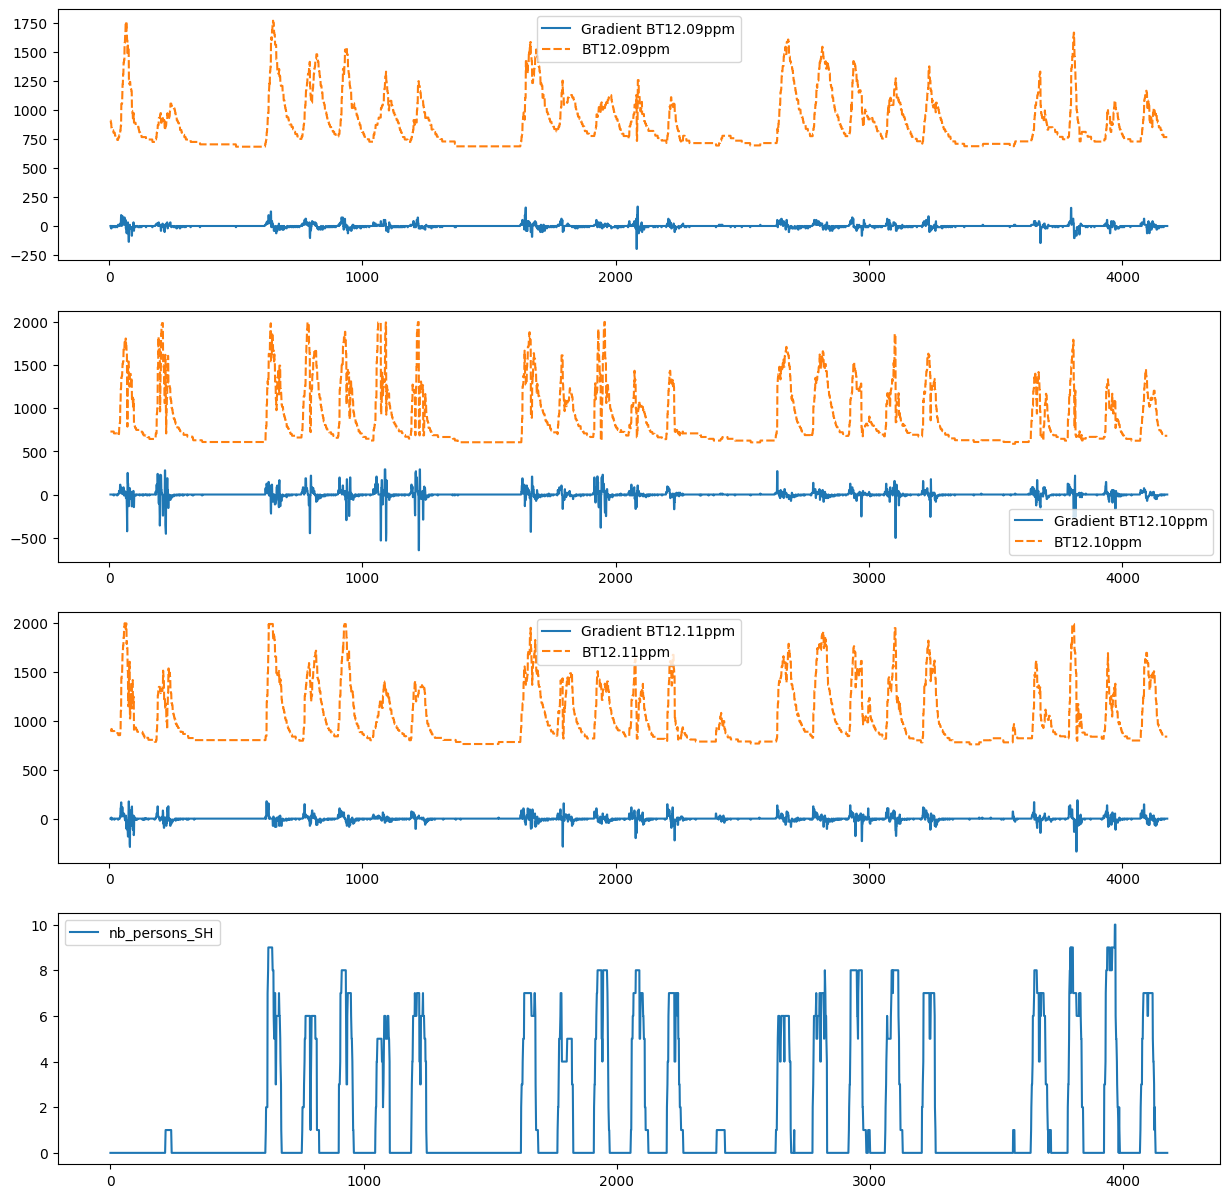

In [14]:
plt.close()
plt.figure(figsize=(15,15))

plot_number = 4

#plot 1:
plt.subplot(plot_number, 1, 1)
sns.lineplot(Fdf[['Gradient '+'BT12.09ppm','BT12.09ppm']])

#plot 2:
plt.subplot(plot_number, 1, 2)
sns.lineplot(Fdf[['Gradient '+'BT12.10ppm','BT12.10ppm']])

#plot 3:
plt.subplot(plot_number, 1, 3)
sns.lineplot(Fdf[['Gradient '+'BT12.11ppm','BT12.11ppm']])

#plot 4:
plt.subplot(plot_number, 1, 4)
sns.lineplot(Fdf[['nb_persons_SH']])

plt.show()

In [15]:
Fdf.to_csv('Clear_data/Organized_Data.csv', index=False)
Fdf.to_excel('Clear_data/Organized_Data.xlsx', index=False)